In [1]:
import numpy as np
import pickle
import json

In [10]:
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
mis_matched = set()
with open("../data/sealion/real_missmatched", "r") as f:
    f.readline()
    for line in f:
        mis_matched.add(int(line))

with open("../data/sealion/train.json", "r") as jfile:
    train_ids = json.load(jfile)
train_ids = [int(s[:-4]) for s in train_ids]

train_ids = list(set(train_ids).difference(mis_matched))

with open("../data/sealion/val.json", "r") as jfile:
    val_ids = json.load(jfile)
val_ids = [int(s[:-4]) for s in val_ids]
val_ids = list(set(val_ids).difference(mis_matched))

In [13]:
n_train_dots = np.zeros((5, ), dtype=np.int32)
total_counts = []
for tid in train_ids:
    with open("../data/sealion/TrainDots/{}.pkl".format(tid), "rb") as p:
        dots = pickle.load(p)
    dots_counts = [len(ds) for ds in dots]
    n_train_dots += np.array(dots_counts)
    total_counts.append(np.sum(dots_counts))

In [14]:
n_train_dots

array([ 2954,  2470, 21285, 11457,  9463], dtype=int32)

(array([ 333.,  110.,   36.,   15.,   21.,    6.,    4.,    6.,    4.,
           3.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,
           0.,    1.]),
 array([  1.00000000e+00,   6.51000000e+01,   1.29200000e+02,
          1.93300000e+02,   2.57400000e+02,   3.21500000e+02,
          3.85600000e+02,   4.49700000e+02,   5.13800000e+02,
          5.77900000e+02,   6.42000000e+02,   7.06100000e+02,
          7.70200000e+02,   8.34300000e+02,   8.98400000e+02,
          9.62500000e+02,   1.02660000e+03,   1.09070000e+03,
          1.15480000e+03,   1.21890000e+03,   1.28300000e+03]),
 <a list of 20 Patch objects>)

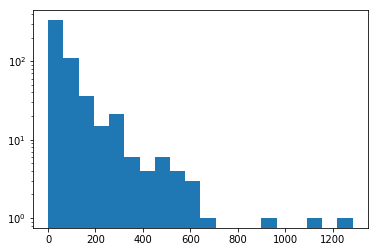

In [17]:
plt.hist(total_counts, bins=20, log=True)

In [18]:
n_val_dots = np.zeros((5, ), dtype=np.int32)
val_total_counts = []
for tid in val_ids:
    with open("../data/sealion/TrainDots/{}.pkl".format(tid), "rb") as p:
        dots = pickle.load(p)
    dots_counts = [len(ds) for ds in dots]
    n_val_dots += np.array(dots_counts)
    val_total_counts.append(np.sum(dots_counts))

(array([ 88.,  32.,  24.,   7.,   7.,   3.,   0.,   4.,   2.,   3.,   1.,
          2.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   1.]),
 array([   1.  ,   37.25,   73.5 ,  109.75,  146.  ,  182.25,  218.5 ,
         254.75,  291.  ,  327.25,  363.5 ,  399.75,  436.  ,  472.25,
         508.5 ,  544.75,  581.  ,  617.25,  653.5 ,  689.75,  726.  ]),
 <a list of 20 Patch objects>)

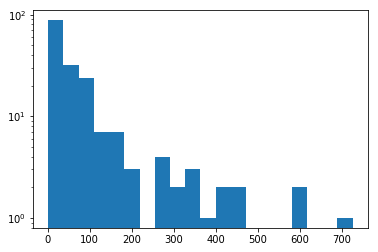

In [19]:
plt.hist(val_total_counts, bins=20, log=True)